In [63]:
import warnings, os
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline

#note, tracts is misleading here in this data - they're actually census subdivisions, not census tracts, I couldn't find data in geojson format of the smaller tracts

In [64]:
# load in the census tracts file 
tracts = gpd.read_file("georef-canada-census-subdivision@public.geojson")
# i got this file from a non-government source -- I couldn't find geojson for what I wanted and this showed up so I went with it. Would ideally do with an official statscan source https://data.opendatasoft.com/explore/dataset/georef-canada-census-subdivision%40public/export/?flg=en-us&disjunctive.prov_name_en&disjunctive.cd_name_en&disjunctive.csd_name_en

Skipping field prov_code: unsupported OGR type: 5
Skipping field prov_name_en: unsupported OGR type: 5
Skipping field cd_code: unsupported OGR type: 5
Skipping field cd_name_en: unsupported OGR type: 5
Skipping field csd_code: unsupported OGR type: 5
Skipping field csd_name_en: unsupported OGR type: 5


In [ ]:
#it skipped some stuff I'd like to have, like the english name and the code -- how can I get around this?

<Axes: >

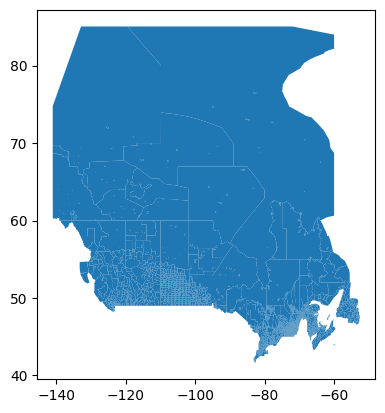

In [6]:
tracts.plot()

In [14]:
tracts.head(20)

,geo_point_2d,year,csd_area_code,csd_type,prov_name_fr,cd_name_fr,csd_name_fr,geometry
0,"{ ""lon"": -52.938952593303334, ""lat"": 47.013110...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 1,Aquaforte,"POLYGON ((-52.92513 47.02215, -52.97031 47.020..."
1,"{ ""lon"": -53.542583130736361, ""lat"": 47.429074...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 1,Whitbourne,"POLYGON ((-53.58551 47.40338, -53.50646 47.415..."
2,"{ ""lon"": -53.218167549285738, ""lat"": 47.734116...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 1,Carbonear,"POLYGON ((-53.26362 47.73361, -53.2248 47.7144..."
3,"{ ""lon"": -53.208671114836484, ""lat"": 47.612479...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 1,Bay Roberts,"POLYGON ((-53.28785 47.55961, -53.18022 47.617..."
4,"{ ""lon"": -52.836523552600525, ""lat"": 47.626914...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 1,Portugal Cove-St. Philip's,"POLYGON ((-52.78286 47.63401, -52.79374 47.675..."
5,"{ ""lon"": -56.790639446695813, ""lat"": 49.868753...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 5,Jackson's Arm,"POLYGON ((-56.75542 49.86826, -56.75728 49.876..."
6,"{ ""lon"": -57.98609080107429, ""lat"": 48.7729159...",2021,CAN,Subdivision of unorganized / Subdivision non o...,Terre-Neuve-et-Labrador,Division No. 5,"Division No. 5, Subd. C","POLYGON ((-57.76979 48.77262, -57.8221 48.8058..."
7,"{ ""lon"": -56.861169200726508, ""lat"": 48.657907...",2021,CAN,Subdivision of unorganized / Subdivision non o...,Terre-Neuve-et-Labrador,Division No. 6,"Division No. 6, Subd. A","POLYGON ((-56.15606 48.52733, -56.14662 48.598..."
8,"{ ""lon"": -53.105784631976803, ""lat"": 48.625634...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 7,Bonavista,"POLYGON ((-53.09002 48.67711, -53.11888 48.665..."
9,"{ ""lon"": -53.372817264911312, ""lat"": 48.559959...",2021,CAN,Town,Terre-Neuve-et-Labrador,Division No. 7,King's Cove,"POLYGON ((-53.40883 48.53358, -53.33342 48.556..."


In [99]:
trimmed_tracts = tracts[[
    'prov_name_fr',
    'csd_name_fr',
    'geometry'
]].rename(columns={"csd_name_fr": "Census_subdivision"})

In [100]:
trimmed_tracts['prov_name_fr'].value_counts()

prov_name_fr
Québec                       1282
Saskatchewan                  951
Colombie-Britannique          751
Ontario                       577
Alberta                       423
Terre-Neuve-et-Labrador       372
Nouveau-Brunswick             266
Manitoba                      239
Île-du-Prince-Édouard          98
Nouvelle-Écosse                95
Territoires du Nord-Ouest      41
Yukon                          35
Nunavut                        31
Name: count, dtype: int64

In [101]:
tracts_NS = trimmed_tracts[trimmed_tracts['prov_name_fr'] == 'Nouvelle-Écosse']

In [102]:
tracts_NS

,prov_name_fr,Census_subdivision,geometry
20,Nouvelle-Écosse,Yarmouth,"POLYGON ((-66.12964 43.57278, -66.10819 43.642..."
21,Nouvelle-Écosse,Beaver Lake 17,"POLYGON ((-62.77053 45.02292, -62.75335 45.017..."
22,Nouvelle-Écosse,Millbrook 27,"POLYGON ((-63.28244 45.3277, -63.30483 45.3392..."
196,Nouvelle-Écosse,Clark's Harbour,"POLYGON ((-65.654 43.45831, -65.65127 43.44785..."
197,Nouvelle-Écosse,Clare,"POLYGON ((-65.71443 44.17177, -65.92958 44.380..."
...,...,...,...
4813,Nouvelle-Écosse,Whycocomagh 2,"POLYGON ((-61.13986 45.98222, -61.15949 45.977..."
4987,Nouvelle-Écosse,Digby,"POLYGON ((-65.76778 44.63073, -65.76205 44.610..."
4988,Nouvelle-Écosse,Gold River 21,"POLYGON ((-64.35515 44.56642, -64.35516 44.552..."
4989,Nouvelle-Écosse,"Colchester, Subd. A","POLYGON ((-63.56447 45.33904, -63.53702 45.382..."


In [103]:
len(tracts_NS)

95

<Axes: >

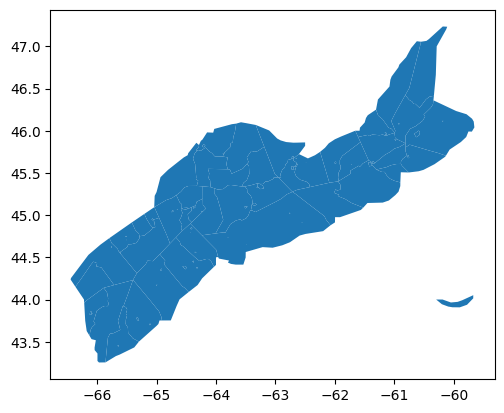

In [104]:
tracts_NS.plot()

In [105]:
trimmed_tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [106]:
trimmed_tracts = trimmed_tracts.to_crs("EPSG:2294")

<Axes: >

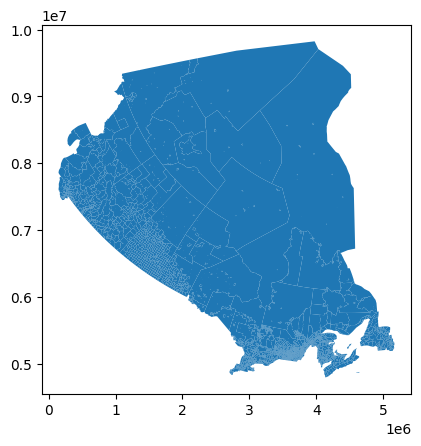

In [107]:
trimmed_tracts.plot()

In [108]:
tracts_NS = tracts_NS.to_crs("EPSG:2294")

<Axes: >

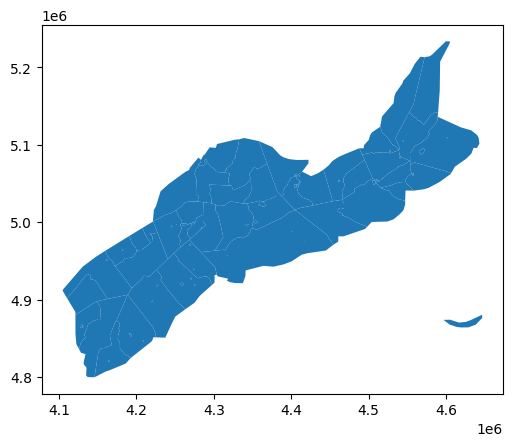

In [109]:
tracts_NS.plot()

In [110]:
len(tracts_NS)

95

In [111]:
electoral_districts = gpd.read_file("georef-canada-federal-electoral-district@public.geojson")

Skipping field prov_code: unsupported OGR type: 5
Skipping field prov_name_en: unsupported OGR type: 5
Skipping field fed_code: unsupported OGR type: 5
Skipping field fed_name_en: unsupported OGR type: 5


In [112]:
electoral_districts

,geo_point_2d,year,fed_area_code,fed_type,prov_name_fr,fed_name_fr,geometry
0,"{ ""lon"": -73.837930835585269, ""lat"": 45.675738...",2021,CAN,federal electoral districts / circonscriptions...,Québec,Thérèse-De Blainville,"POLYGON ((-73.84646 45.72176, -73.92567 45.685..."
1,"{ ""lon"": -72.792466642507776, ""lat"": 45.653266...",2021,CAN,federal electoral districts / circonscriptions...,Québec,Saint-Hyacinthe--Bagot,"POLYGON ((-72.3144 45.59707, -72.57794 45.7525..."
2,"{ ""lon"": -79.027222328194313, ""lat"": 43.870101...",2021,CAN,federal electoral districts / circonscriptions...,Ontario,Ajax,"POLYGON ((-78.97051 43.8335, -79.00854 43.9225..."
3,"{ ""lon"": -81.819236267194768, ""lat"": 42.871237...",2021,CAN,federal electoral districts / circonscriptions...,Ontario,Lambton--Kent--Middlesex,"POLYGON ((-81.18966 43.0698, -81.17886 43.0743..."
4,"{ ""lon"": -79.697963028774907, ""lat"": 43.445575...",2021,CAN,federal electoral districts / circonscriptions...,Ontario,Oakville,"POLYGON ((-79.62509 43.48113, -79.68183 43.522..."
...,...,...,...,...,...,...,...
333,"{ ""lon"": -79.601205085181576, ""lat"": 43.798434...",2021,CAN,federal electoral districts / circonscriptions...,Ontario,Vaughan--Woodbridge,"POLYGON ((-79.54618 43.82826, -79.54869 43.846..."
334,"{ ""lon"": -97.146298247706952, ""lat"": 49.779308...",2021,CAN,federal electoral districts / circonscriptions...,Manitoba,Winnipeg-Sud,"POLYGON ((-97.04866 49.79251, -97.09281 49.838..."
335,"{ ""lon"": -113.37521543824468, ""lat"": 53.642130...",2021,CAN,federal electoral districts / circonscriptions...,Alberta,Edmonton Manning,"POLYGON ((-113.29332 53.67294, -113.29506 53.7..."
336,"{ ""lon"": -116.93799119894895, ""lat"": 53.234340...",2021,CAN,federal electoral districts / circonscriptions...,Alberta,Yellowhead,"POLYGON ((-117.50952 54.5889, -117.98583 54.58..."


In [113]:
trimmed_electoral_districts = electoral_districts[[
    'prov_name_fr',
    'fed_name_fr',
    'geometry'
]].rename(columns={"fed_name_fr": "Electoral_district"})

In [114]:
len(trimmed_electoral_districts)

338

In [115]:
trimmed_electoral_districts.head(2)

,prov_name_fr,Electoral_district,geometry
0,Québec,Thérèse-De Blainville,"POLYGON ((-73.84646 45.72176, -73.92567 45.685..."
1,Québec,Saint-Hyacinthe--Bagot,"POLYGON ((-72.3144 45.59707, -72.57794 45.7525..."


<Axes: >

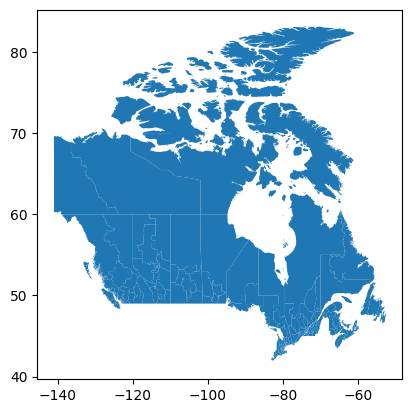

In [116]:
trimmed_electoral_districts.plot()

In [117]:
trimmed_electoral_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [118]:
electoral_districts_NS = trimmed_electoral_districts[trimmed_electoral_districts['prov_name_fr'] == 'Nouvelle-Écosse']

In [119]:
len(electoral_districts_NS)

11

In [120]:
electoral_districts_NS = electoral_districts_NS.to_crs("EPSG:2294")

<Axes: >

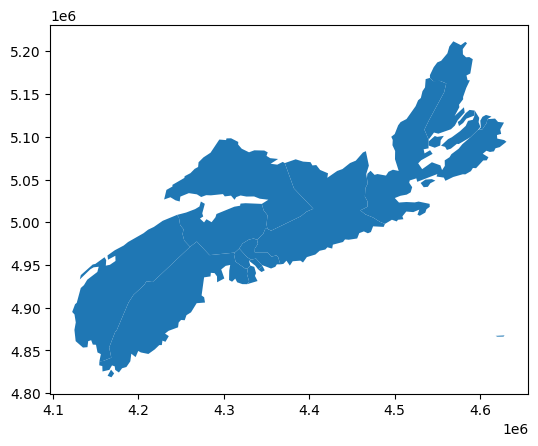

In [121]:
electoral_districts_NS.plot()

In [122]:
electoral_districts_NS.head(2)

,prov_name_fr,Electoral_district,geometry
41,Nouvelle-Écosse,Dartmouth--Cole Harbour,"POLYGON ((4344350.197 4950045.751, 4337657.014..."
89,Nouvelle-Écosse,Halifax,"MULTIPOLYGON (((4622581.287 4866174.202, 46273..."


In [123]:
# merge the two shapefiles together
NS_electoral_tracts = gpd.overlay(tracts_NS,electoral_districts_NS, how='intersection')

<Axes: >

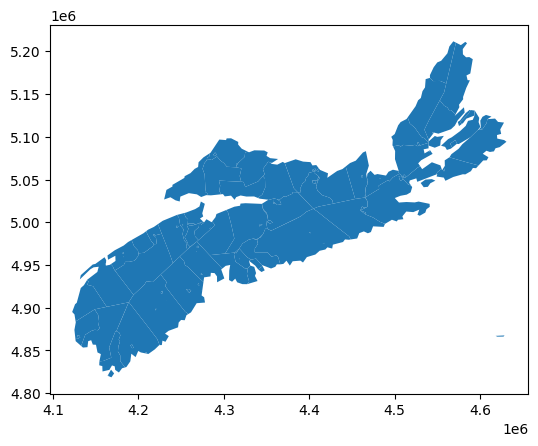

In [124]:
NS_electoral_tracts.plot()

In [125]:
len(NS_electoral_tracts)

130

In [128]:
# calculate the area covered 
NS_electoral_tracts['area'] = NS_electoral_tracts['geometry'].area

In [129]:
NS_electoral_tracts.head()

,prov_name_fr_1,Census_subdivision,prov_name_fr_2,Electoral_district,geometry,area
0,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,"POLYGON ((4148837.342 4898049.446, 4152970.589...",6.696263e+08
1,Nouvelle-Écosse,Beaver Lake 17,Nouvelle-Écosse,Nova-Centre,"POLYGON ((4400352.785 4988395.377, 4401481.681...",8.513391e+05
2,Nouvelle-Écosse,Millbrook 27,Nouvelle-Écosse,Cumberland--Colchester,"POLYGON ((4357572.143 5021874.06, 4358551.653 ...",2.246355e+06
3,Nouvelle-Écosse,Clark's Harbour,Nouvelle-Écosse,South Shore--St. Margarets,"POLYGON ((4165428.877 4821053.541, 4165417.63 ...",1.274222e+06
4,Nouvelle-Écosse,Clare,Nouvelle-Écosse,Nova-Ouest,"POLYGON ((4141721.949 4931055.197, 4140309.746...",9.122383e+08


In [130]:
# calculate the tracts covered 
tracts_NS['total_tract_area'] = tracts_NS['geometry'].area

In [131]:
# calculations
calcs = NS_electoral_tracts.drop('geometry', axis=1)\
.merge(tracts_NS.drop('geometry', axis=1))\
.sort_values('Census_subdivision')

In [132]:
calcs

,prov_name_fr_1,Census_subdivision,prov_name_fr_2,Electoral_district,area,prov_name_fr,total_tract_area
104,Nouvelle-Écosse,Amherst,Nouvelle-Écosse,Cumberland--Colchester,9.106538e+06,Nouvelle-Écosse,9.106538e+06
33,Nouvelle-Écosse,Annapolis Royal,Nouvelle-Écosse,Nova-Ouest,1.461314e+06,Nouvelle-Écosse,1.461314e+06
77,Nouvelle-Écosse,Annapolis Valley First Nation,Nouvelle-Écosse,Kings--Hants,6.776597e+05,Nouvelle-Écosse,6.776597e+05
14,Nouvelle-Écosse,"Annapolis, Subd. A",Nouvelle-Écosse,Nova-Ouest,6.378984e+08,Nouvelle-Écosse,8.258252e+08
113,Nouvelle-Écosse,"Annapolis, Subd. B",Nouvelle-Écosse,Nova-Ouest,3.847291e+08,Nouvelle-Écosse,4.551965e+08
...,...,...,...,...,...,...,...
91,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,8.992899e+06,Nouvelle-Écosse,8.992899e+06
90,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,8.992899e+06,Nouvelle-Écosse,9.485714e+08
1,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,6.696263e+08,Nouvelle-Écosse,8.992899e+06
0,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,6.696263e+08,Nouvelle-Écosse,9.485714e+08


In [133]:
# tract percent 
calcs['tract_percent'] = calcs['area']/calcs['total_tract_area']

In [134]:
len(calcs)

141

In [135]:
len(tracts_NS)

95

In [136]:
len(NS_electoral_tracts)

130

In [137]:
#I think i've maybe lost the plot? divided the wrong thing by the wrong thing? 

In [140]:
calcs.tail()

,prov_name_fr_1,Census_subdivision,prov_name_fr_2,Electoral_district,area,prov_name_fr,total_tract_area,tract_percent
91,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,8.992899e+06,Nouvelle-Écosse,8.992899e+06,1.000000
90,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,8.992899e+06,Nouvelle-Écosse,9.485714e+08,0.009480
1,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,6.696263e+08,Nouvelle-Écosse,8.992899e+06,74.461678
0,Nouvelle-Écosse,Yarmouth,Nouvelle-Écosse,Nova-Ouest,6.696263e+08,Nouvelle-Écosse,9.485714e+08,0.705931
20,Nouvelle-Écosse,Yarmouth 33,Nouvelle-Écosse,Nova-Ouest,3.444279e+05,Nouvelle-Écosse,3.444279e+05,1.000000


In [139]:
calcs.Census_subdivision.nunique()

89

In [141]:
# export the csv, first making directories that may not exist yet locally
os.makedirs('../data/output/neighborhood', exist_ok=True)
calcs.to_csv('../data/output/neighborhood/NS_tractsubdivision_to_electoraldistrict_portions.csv', index=False)